In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

In [2]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df =  df.set_index(['Month'])

In [39]:
import warnings
warnings.filterwarnings("ignore")

## Triple Exponnetial Smoothing -- Holt Winters Model -- alpha,beta,gamma

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose


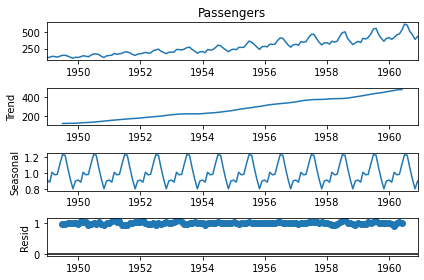

In [19]:
airpax_decompose = seasonal_decompose(df['Passengers'], model="multiplicative", freq=12)
airpax_decompose.plot()
plt.show()

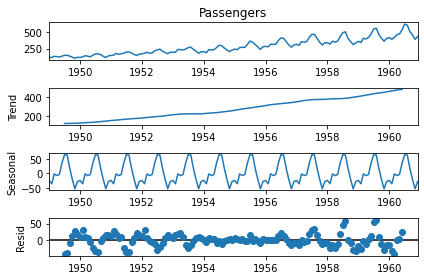

In [20]:
airpax_decompose = seasonal_decompose(df['Passengers'], model="additive", freq=12)
airpax_decompose.plot()
plt.show()

## https://www.kaggle.com/gauravduttakiit/time-series-forecasting
## https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
## https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.fit.html#statsmodels.tsa.holtwinters.ExponentialSmoothing.fit
Parameters
endogarray_like
The time series to model.

trend{“add”, “mul”, “additive”, “multiplicative”, None}, optional
Type of trend component.

damped_trend: bool, optional

Should the trend component be damped.

seasonal{“add”, “mul”, “additive”, “multiplicative”, None}, optional
Type of seasonal component.

seasonal_periodsint, optional

The number of periods in a complete seasonal cycle, e.g., 4 for quarterly data or 7 for daily data with a weekly cycle.

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
def TES_function(data,alpha1,beta1,gamma1,dt1,SP1,T1,S1,predict_m):
    a  = df.shape[0]
    train_data = data[0:a-predict_m]
    test_data =data[a-predict_m:]
    model1 = ExponentialSmoothing(train_data,seasonal_periods=SP1,trend=T1,seasonal=S1)
    model_fit1 = model1.fit(smoothing_level = alpha1,damping_trend= dt1,smoothing_slope = beta1,
                            smoothing_seasonal=gamma1,optimized=False )
    # make prediction
    predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
    compare_df = pd.concat(
        [data.tail(predict_m),
        predictions.apply(np.floor)], axis=1).rename(
        columns={'Passengers': 'actual', 0:'predicted'})
    #compare_df.plot()
    r2 = r2_score(data.tail(predict_m), predictions.apply(np.floor))
    rmse1 = np.sqrt(mean_squared_error(data.tail(predict_m), predictions.apply(np.floor)))
    print("RMSE: {} , r2_score:{} ,AIC:{},BIC:{}".format(rmse1, r2 , model_fit1.aic,model_fit1.bic))
    #return r2

RMSE: 26.981475126464083 , r2_score:0.9015525162182163 ,AIC:839.7516658719982,BIC:886.5877248345134


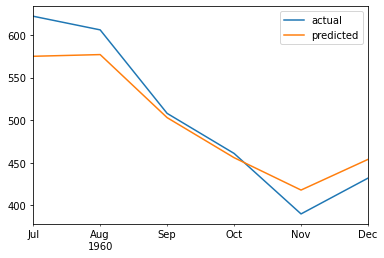

In [44]:
TES_function(df['Passengers'],0.1,0.2,0.3,0.1,12,'additive','additive',6)

RMSE: 10.279429296739517 , r2_score:0.9857106903118931 ,AIC:753.2580241638142,BIC:800.0940831263295


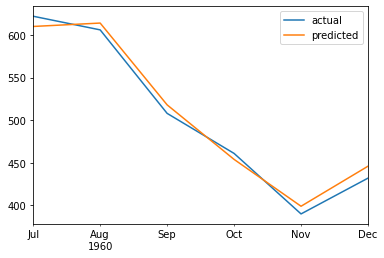

In [45]:
TES_function(df['Passengers'],0.1,0.2,0.3,0.1,12,'additive','multiplicative',6)

RMSE: 12.616127245183709 , r2_score:0.9784758820944132 ,AIC:760.2098822617617,BIC:807.0459412242769


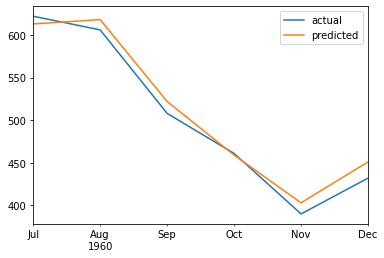

In [46]:
TES_function(df['Passengers'],0.1,0.2,0.3,0.1,12,'multiplicative','multiplicative',6)

RMSE: 26.981475126464083 , r2_score:0.9015525162182163 ,AIC:839.7516658719982,BIC:886.5877248345134


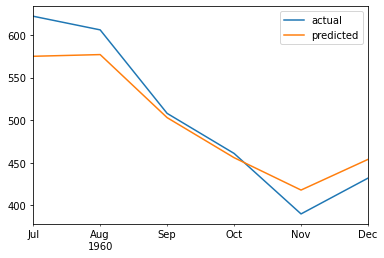

In [47]:
TES_function(df['Passengers'],0.1,0.2,0.3,0.1,12,'add','add',6)

RMSE: 266.37317182228895 , r2_score:-8.595203840533708 ,AIC:1371.34064786502,BIC:1418.1767068275353


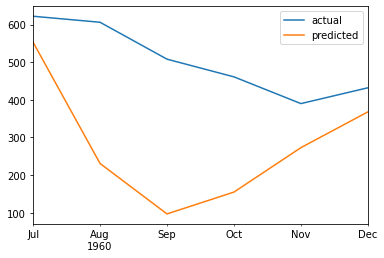

In [53]:
TES_function(df['Passengers'],0.9,0.7,0.7,0.8,12,'multiplicative','multiplicative',6)

In [58]:
alpha1 = [0.1,0.2,0.3]
beta1 = [0.1,0.2,0.3]
phi1 = [0.1,0.2,0.3]
gamma1 = [0.1,0.2,0.3]
trend=[ 'additive']
seasonal =[ 'multiplicative']
seasonal_period = [12]

#### Insights for Holt Winter Algorithm and hyperparameter tuning :
#### if we increase the value of alpha ,beta ,gamma and phi beyond 0.4 then model does not give good results .
#### so in grid i have kept it bw 0.1 to 0.3
#### after seeing plots , got to know that trend is additive i.e linear and sesonality is multiplicative
#### seasonal period 12 is chosen Since TS patterns are repeated after 12 months

In [59]:
for i in alpha1:
    for j in beta1:
        for g in gamma1:
            for k in phi1:
                for sp1 in seasonal_period:
                    for t1 in trend:
                        for s1 in seasonal:
                            print("alpha: {},beta : {},gamma:{},phi :{},SP:{},trend:{},S:{}".format(i,j,g,k,sp1,t1,s1))
                            TES_function(df['Passengers'],i,j,g,k,sp1,t1,s1,6)

alpha: 0.1,beta : 0.1,gamma:0.1,phi :0.1,SP:12,trend:additive,S:multiplicative
RMSE: 28.047578623950173 , r2_score:0.8936190193566805 ,AIC:810.9382118832411,BIC:857.7742708457564
alpha: 0.1,beta : 0.1,gamma:0.1,phi :0.2,SP:12,trend:additive,S:multiplicative
RMSE: 28.047578623950173 , r2_score:0.8936190193566805 ,AIC:810.9382118832411,BIC:857.7742708457564
alpha: 0.1,beta : 0.1,gamma:0.1,phi :0.3,SP:12,trend:additive,S:multiplicative
RMSE: 28.047578623950173 , r2_score:0.8936190193566805 ,AIC:810.9382118832411,BIC:857.7742708457564
alpha: 0.1,beta : 0.1,gamma:0.2,phi :0.1,SP:12,trend:additive,S:multiplicative
RMSE: 18.366636418607882 , r2_score:0.9543823930461698 ,AIC:775.3705212420338,BIC:822.206580204549
alpha: 0.1,beta : 0.1,gamma:0.2,phi :0.2,SP:12,trend:additive,S:multiplicative
RMSE: 18.366636418607882 , r2_score:0.9543823930461698 ,AIC:775.3705212420338,BIC:822.206580204549
alpha: 0.1,beta : 0.1,gamma:0.2,phi :0.3,SP:12,trend:additive,S:multiplicative
RMSE: 18.366636418607882 , r

RMSE: 9.00925450115972 , r2_score:0.9890238267853185 ,AIC:741.703276804182,BIC:788.5393357666973
alpha: 0.2,beta : 0.3,gamma:0.3,phi :0.2,SP:12,trend:additive,S:multiplicative
RMSE: 9.00925450115972 , r2_score:0.9890238267853185 ,AIC:741.703276804182,BIC:788.5393357666973
alpha: 0.2,beta : 0.3,gamma:0.3,phi :0.3,SP:12,trend:additive,S:multiplicative
RMSE: 9.00925450115972 , r2_score:0.9890238267853185 ,AIC:741.703276804182,BIC:788.5393357666973
alpha: 0.3,beta : 0.1,gamma:0.1,phi :0.1,SP:12,trend:additive,S:multiplicative
RMSE: 26.86385427794505 , r2_score:0.9024089732657684 ,AIC:794.5679729475112,BIC:841.4040319100264
alpha: 0.3,beta : 0.1,gamma:0.1,phi :0.2,SP:12,trend:additive,S:multiplicative
RMSE: 26.86385427794505 , r2_score:0.9024089732657684 ,AIC:794.5679729475112,BIC:841.4040319100264
alpha: 0.3,beta : 0.1,gamma:0.1,phi :0.3,SP:12,trend:additive,S:multiplicative
RMSE: 26.86385427794505 , r2_score:0.9024089732657684 ,AIC:794.5679729475112,BIC:841.4040319100264
alpha: 0.3,beta :

### Good models selected after performing Hyperparameter tuning:
### TREND is additive and seasonality is Multiplicative

alpha: 0.2,beta : 0.1,gamma:0.3,phi :0.3,SP:12,trend:additive,S:multiplicative
RMSE: 9.565563234854496 , r2_score:0.9876264494972071 ,AIC:728.0240099539682,BIC:774.8600689164834
                
alpha: 0.2,beta : 0.2,gamma:0.3,phi :0.2,SP:12,trend:additive,S:multiplicative
RMSE: 8.051914886120775 , r2_score:0.9912325844342688 ,AIC:734.5203084478159,BIC:781.3563674103311
                
alpha: 0.2,beta : 0.2,gamma:0.3,phi :0.2,SP:12,trend:additive,S:multiplicative
RMSE: 8.051914886120775 , r2_score:0.9912325844342688 ,AIC:734.5203084478159,BIC:781.3563674103311
                
alpha: 0.2,beta : 0.2,gamma:0.3,phi :0.3,SP:12,trend:additive,S:multiplicative
RMSE: 8.051914886120775 , r2_score:0.9912325844342688 ,AIC:734.5203084478159,BIC:781.3563674103311

alpha: 0.2,beta : 0.3,gamma:0.3,phi :0.1,SP:12,trend:additive,S:multiplicative
RMSE: 9.00925450115972 , r2_score:0.9890238267853185 ,AIC:741.703276804182,BIC:788.5393357666973
                
alpha: 0.2,beta : 0.3,gamma:0.3,phi :0.2,SP:12,trend:additive,S:multiplicative
RMSE: 9.00925450115972 , r2_score:0.9890238267853185 ,AIC:741.703276804182,BIC:788.5393357666973

## These models can be selected:

alpha: 0.2,beta : 0.2,gamma:0.3,phi :0.2,SP:12,trend:additive,S:multiplicative
RMSE: 8.051914886120775 , r2_score:0.9912325844342688 ,AIC:734.5203084478159,BIC:781.3563674103311
                
alpha: 0.2,beta : 0.2,gamma:0.3,phi :0.2,SP:12,trend:additive,S:multiplicative
RMSE: 8.051914886120775 , r2_score:0.9912325844342688 ,AIC:734.5203084478159,BIC:781.3563674103311
                
alpha: 0.2,beta : 0.2,gamma:0.3,phi :0.3,SP:12,trend:additive,S:multiplicative
RMSE: 8.051914886120775 , r2_score:0.9912325844342688 ,AIC:734.5203084478159,BIC:781.3563674103311